In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016],
    'Rainfall(mm)': [285, 285, 285, 285, 285, 285, 285],
    'Pesticides(hg/ha)': [56, 56, 56, 56, 56, 56, 56],
    'Temperature': [20.62, 19.26, 20.11, 20.73, 20.60, 20.52, 20.60],
    'Crop_Yield': [19882, 19297, 18999, 18683, 16000, 18420, 20591],
    'Temperature': [20.62, 19.26, 20.11, 20.73, 20.60, 20.52, 20.60],
    'Crop_Yield': [19882, 19297, 18999, 18683, 16000, 18420, 20591]
}

In [5]:
df = pd.DataFrame(data)

In [7]:
X = df[['Rainfall(mm)', 'Pesticides(hg/ha)', 'Temperature']]
Y = df['Crop_Yield']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, Y_train)

LinearRegression()

In [13]:
Y_pred = model.predict(X_test)

In [14]:
mse = mean_squared_error(Y_test, Y_pred)
rsme = np.sqrt(mse)

In [18]:
print(f"Root Mean Squared Error: {rsme}")

Root Mean Squared Error: 844.3444864591781


In [23]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

In [24]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Predicted Crop Yield:", Y_pred)
print("Actual Crop Yield:", list(Y_test))
print("Root Mean Squared Error (RMSE):", rmse)

Model Coefficients: [   0.            0.         -873.33036509]
Model Intercept: 36480.255788067676
Predicted Crop Yield: [18472.18365984 19659.91295637 18559.51669635]
Actual Crop Yield: [19882, 19297, 18420]
Root Mean Squared Error (RMSE): 844.3444864591781


In [25]:
import matplotlib.pyplot as plt

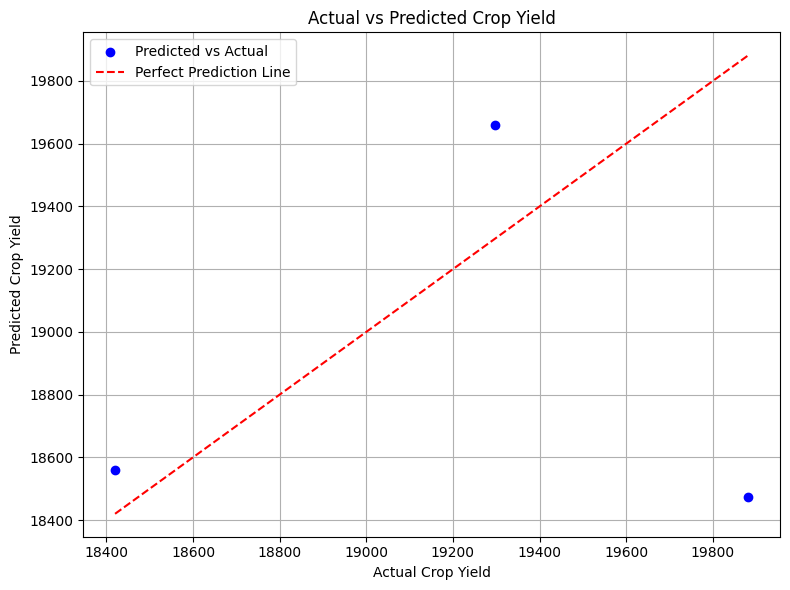

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs Predicted Crop Yield')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [29]:
Y_pred = model.predict(X_test)

In [31]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 844.3444864591781


In [32]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

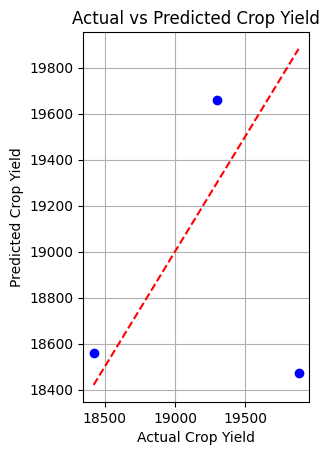

In [34]:
plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.grid(True)


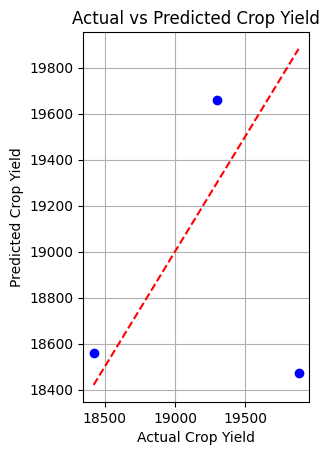

In [36]:
plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.grid(True)

In [38]:
temperature_2025 = 20.4

In [39]:
new_data = pd.DataFrame({
    'Rainfall(mm)': [285],
    'Pesticides(hg/ha)': [56],
    'Temperature': [temperature_2025]
})

In [40]:
new_data = pd.DataFrame({
    'Rainfall(mm)': [285],
    'Pesticides(hg/ha)': [56],
    'Temperature': [temperature_2025]
})

In [41]:
print("\n--- Predict Crop Yield for 2025 ---")
try:
    temp_input = float(input("Enter expected average temperature for 2025 (°C): "))
    input_data = pd.DataFrame({
        'Rainfall(mm)': [285],
        'Pesticides(hg/ha)': [56],
        'Temperature': [temp_input]
    })
    prediction = model.predict(input_data)
    print(f"\nEstimated Crop Yield for 2025 (Temp: {temp_input}°C): {prediction[0]:.2f}")
except ValueError:
    print("Invalid input. Please enter a numeric temperature value.")


--- Predict Crop Yield for 2025 ---
Enter expected average temperature for 2025 (°C): 23

Estimated Crop Yield for 2025 (Temp: 23.0°C): 16393.66


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016],
    'Rainfall': [285, 285, 285, 285, 285, 285, 285],
    'Crop_yield': [19882, 19297, 18999, 18683, 16000, 18420, 20591]
}

In [44]:
df = pd.DataFrame(data)

In [45]:
df['Prev_Crop_yield'] = df['Crop_yield'].shift(1)

In [46]:
df = df.dropna()

In [48]:
X = df[['Rainfall', 'Prev_Crop_yield']]
y = df['Crop_yield']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [51]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 765137.9971927571
R-squared: -33.46412311124531


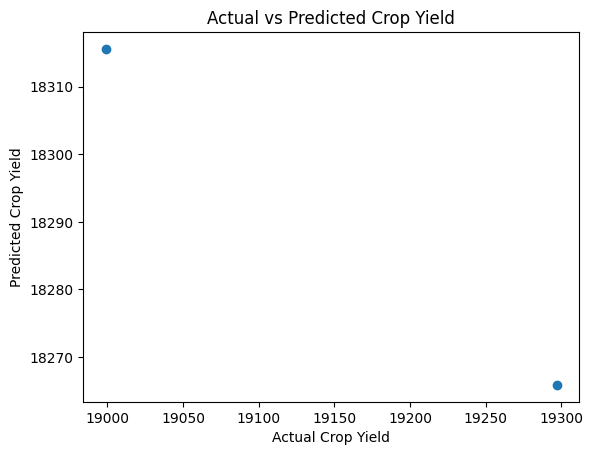

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.title('Actual vs Predicted Crop Yield')
plt.show()